# Compare lead, copper, no gate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import Methods as m
import importlib
importlib.reload(m)

<module 'Methods' from '/Users/markzhitnitsky/Desktop/School/2025-26 Year/PHYS409/Experiment 1 - PET/Code/Methods.py'>

In [2]:
dist_array_nothing, counts_array_nothing, ucounts_array_nothing = m.readLineScan("./data/2026-01-28 broad measurements/Jan 28, 2026, 4_38 PM, Scan1, 0_0 Deg, nothing.dat")
dist_array_copper, counts_array_copper, ucounts_array_copper = m.readLineScan("./data/2026-01-28 broad measurements/Jan 28, 2026, 3_52 PM, Scan1, 0_0 Deg, copper.dat")
dist_array_leadcopper, counts_array_leadcopper, ucounts_array_leadcopper = m.readLineScan("./data/2026-01-28 broad measurements/Jan 30, 2026, 9_57 AM, Scan1, 0_0 Deg, lead+copper.dat")

exposure_nothing = 15
exposure_copper = 65
exposure_leadcopper = 2400
# ^ exposure time in seconds, so I can correctly change the ratios

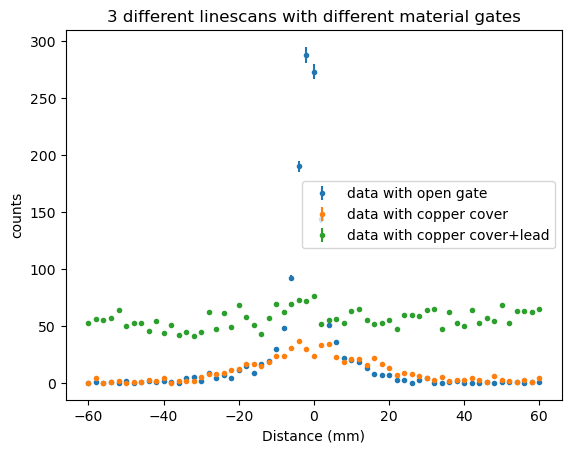

In [3]:
plt.figure()
plt.errorbar(dist_array_nothing, counts_array_nothing, yerr=ucounts_array_nothing, fmt='.', label=f"data with open gate")
plt.errorbar(dist_array_copper, counts_array_copper, yerr=ucounts_array_copper, fmt='.', label=f"data with copper cover")
plt.errorbar(dist_array_leadcopper, counts_array_leadcopper, yerr=ucounts_array_leadcopper, fmt='.', label=f"data with copper cover+lead")
plt.title("3 different linescans with different material gates")
plt.xlabel("Distance (mm)")
plt.ylabel("counts")
plt.legend()
plt.savefig("./figures/Linescans with different material gates.png")
plt.show()

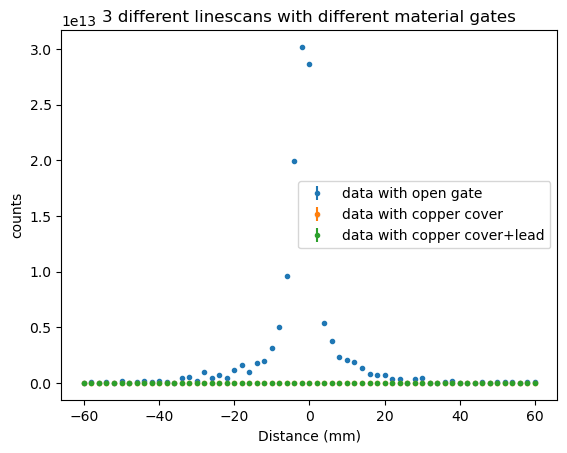

In [10]:
# rescale have same background as leadcopper
counts_array_nothing = np.array(counts_array_nothing) * exposure_leadcopper/exposure_nothing
counts_array_copper = np.array(counts_array_copper) * exposure_leadcopper/exposure_copper
# counts_array_leadcopper
# print(ucounts_array_nothing)
ucounts_array_nothing = np.array(ucounts_array_nothing) * (exposure_leadcopper/exposure_nothing)
ucounts_array_copper = np.array(ucounts_array_copper) * (exposure_leadcopper/exposure_copper)
# ucounts_array_leadcopper

plt.figure()
plt.errorbar(dist_array_nothing, counts_array_nothing, yerr=ucounts_array_nothing, fmt='.', label=f"data with open gate")
plt.errorbar(dist_array_copper, counts_array_copper, yerr=ucounts_array_copper, fmt='.', label=f"data with copper cover")
plt.errorbar(dist_array_leadcopper, counts_array_leadcopper, yerr=ucounts_array_leadcopper, fmt='.', label=f"data with copper cover+lead")
plt.title("3 different linescans with different material gates")
plt.xlabel("Distance (mm)")
plt.ylabel("counts")
plt.legend()
plt.savefig("./figures/Linescans with different material gates, rescaled to have equal background.png")
plt.show()